## Exploring Music Database

I am using a databse called chinook that has data about music, including information for example invoices, artist, albums, etc. I used SQL lite to make queries, export the query, and import them into jupyter notebook in order to visualize the output. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# bar plot function
def bar_plot(x , y, color=None, title=None):
    '''
    x = the dataframe indexed with the feature you want to use as x
    y = dataframe indexed with the feature you want to use as y
    color= if you want to color each bar
    '''
    plt.rcParams['figure.figsize'] = [9, 3.5]
    plt.rcParams["figure.autolayout"] = True
    plt.bar(x, y, color=color)
    
    plt.title(title)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    
    plt.xticks(rotation=90, fontsize=10);
    

#### Country Revenue

In [3]:
country_revenue = pd.read_csv('country_revenue.csv')
country_revenue

,Country,Revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


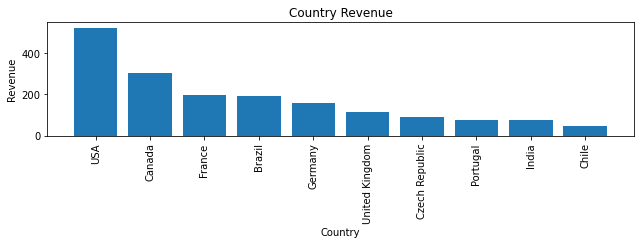

In [4]:
# country by revenue
bar_plot(country_revenue['Country'][:10], country_revenue['Revenue'][:10], title='Country Revenue')

The data shows USA is the top country for Revenue at \\$523.06 while Canada and France are \\$303.96 and \\$195.10 respectively.

#### Album Revenue

In [5]:
album_revenue = pd.read_csv('album_revenue.csv')
pd.DataFrame(album_revenue)

,Album,Revenue
0,Greatest Hits,372.51
1,"Lost, Season 2",290.18
2,"Heroes, Season 1",238.61
3,"Lost, Season 1",223.65
4,"Lost, Season 3",211.80
...,...,...
299,Chopin: Piano Concertos Nos. 1 & 2,1.98
300,Beethoven: Symphony No. 6 'Pastoral' Etc.,1.98
301,Bartok: Violin & Viola Concertos,1.98
302,Bach: The Brandenburg Concertos,1.98


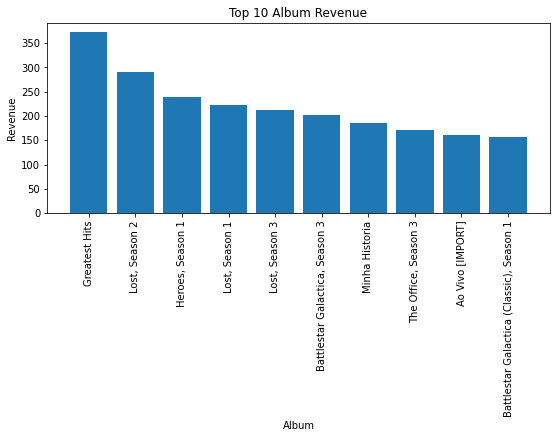

In [6]:
#top 10 album revenue
bar_plot(album_revenue['Album'][:10], album_revenue['Revenue'][:10], title='Top 10 Album Revenue')

It looks like some TV shows were included in the Album sales. Though this information maybe useful if your just trying to make money off of a soundtrack/ music, but may not really apply to figuring out which genre or type of artist to invest in. I only want actual music artists though so I will need to filter out the TV music. I will do this in sql and import a filtered query. 

In [7]:
album_genre_revenue = pd.read_csv('album_genre_revenue.csv')
album_genre_revenue

,Album,Genre,Revenue
0,Greatest Hits,Rock,372.51
1,Minha Historia,Latin,185.13
2,Ao Vivo [IMPORT],Latin,161.74
3,Unplugged,Blues,151.47
4,Volume Dois,Alternative & Punk,139.99
...,...,...,...
282,Chopin: Piano Concertos Nos. 1 & 2,Classical,1.98
283,Beethoven: Symphony No. 6 'Pastoral' Etc.,Classical,1.98
284,Bartok: Violin & Viola Concertos,Classical,1.98
285,Bach: The Brandenburg Concertos,Classical,1.98


In [8]:
album_genre_revenue['Album'][7] = 'Acustico'
album_genre_revenue['Album'][7]
album_genre_revenue[:10]

,Album,Genre,Revenue
0,Greatest Hits,Rock,372.51
1,Minha Historia,Latin,185.13
2,Ao Vivo [IMPORT],Latin,161.74
3,Unplugged,Blues,151.47
4,Volume Dois,Alternative & Punk,139.99
5,My Way: The Best Of Frank Sinatra [Disc 1],Easy Listening,138.60
6,Achtung Baby,Rock,133.16
7,Acustico,Alternative & Punk,129.76
8,Afrociberdelia,Latin,129.69
9,Up An' Atom,Jazz,127.71


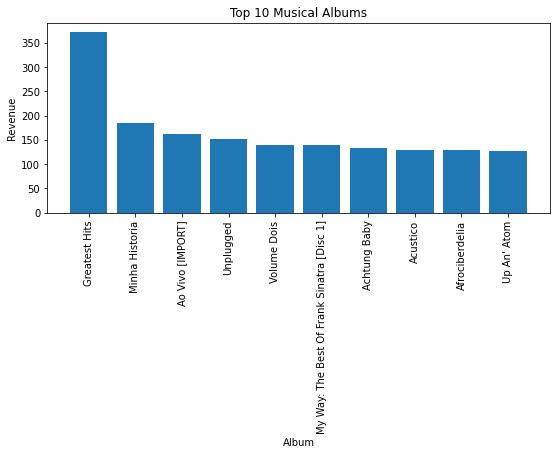

In [9]:
# top 10 musical albums
# note: try to color each bar by the genre. 
bar_plot(album_genre_revenue['Album'][:10], album_genre_revenue['Revenue'][:10], title='Top 10 Musical Albums')

This looks better since these are actual music Albums.

#### Artists Revenue

In [10]:
artist_revenue = pd.read_csv('artist_revenue.csv')
artist_revenue

,Artists,Revenue
0,The Police,372.51
1,Ton Koopman,290.18
2,Leonard Bernstein & New York Philharmonic,238.61
3,Aaron Copland & London Symphony Orchestra,223.65
4,Boston Symphony Orchestra & Seiji Ozawa,211.80
...,...,...
261,Snow Patrol,12.87
262,Accept,10.89
263,Jack Johnson,5.94
264,Ben Harper,3.96


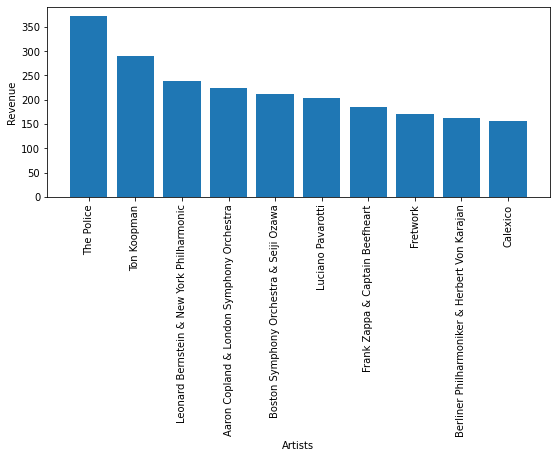

In [11]:
#top 10 artist revenue
bar_plot(artist_revenue['Artists'][:10], artist_revenue['Revenue'][:10])

#### Genre Revenue

In [12]:
genre_revenue = pd.read_csv('genre_revenue.csv')
genre_revenue

,Genre,Revenue
0,Rock,7720.02
1,Latin,3472.55
2,Metal,2093.13
3,Alternative & Punk,1961.66
4,TV Shows,817.71
5,Jazz,746.46
6,Drama,544.61
7,Blues,429.66
8,R&B/Soul,338.62
9,Reggae,332.64


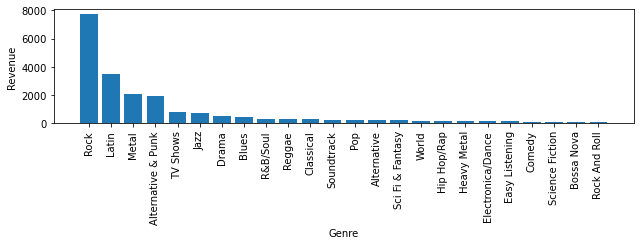

In [13]:
bar_plot(genre_revenue['Genre'], genre_revenue['Revenue'])

I want to add up all the sub genres and fix some simple string differences like 'Rock' and 'Rock and Roll' or 'Metal' and 'Heavy Metal'.
I will make the main genres:
- Hip Hop/ Rap
    - Hip Hop
    - R&B
    - Rap
    - Soul
- Jazz
    - Blues
    - Jazz
    - Reggae
- World
    - Latin
    - World
- Other
    - Bossa Nova
    - Classical
    - Comedy
    - Drama
    - Easy Listening
    - Electronic/ Dance
    - Sci Fi & Fantasy
    - Soundtrack
    - TV Shows
    - World
- Pop
- Rock
    - Alternative
    - Alternative & Punk
    - Heavy Metal
    - Metal
    - Rock
    - Rock and Roll


In [65]:
for index, row in genre_revenue.iterrows():
    print(row['Genre'])

Rock
Latin
Metal
Alternative & Punk
TV Shows
Jazz
Drama
Blues
R&B/Soul
Reggae
Classical
Soundtrack
Pop
Alternative
Sci Fi & Fantasy
World
Hip Hop/Rap
Heavy Metal
Electronica/Dance
Easy Listening
Comedy
Science Fiction
Bossa Nova
Rock And Roll


In [81]:
rock_list = [
    'Alternative',
    'Alternative & Punk',
    'Heavy Metal',
    'Metal',
    'Rock',
    'Rock And Roll']

In [99]:
rock_df = pd.DataFrame()

for index, row in genre_revenue.iterrows():
    for rl in rock_list:
        if row['Genre'] == rl:
            print(pd.DataFrame(row).dtypes)
            

0    object
dtype: object
2    object
dtype: object
3    object
dtype: object
13    object
dtype: object
17    object
dtype: object
23    object
dtype: object


In [93]:
### combine genres
rock_df = pd.DataFrame()

for index, row in genre_revenue.iterrows():
    for rl in rock_list:
        if row['Genre'] == rl:
            row_df = pd.DataFrame(row)
            rock_df = pd.concat([row_df, rock_df])
rock_df

,0,2,3,13,17,23
Genre,NaN,NaN,NaN,NaN,NaN,Rock And Roll
Revenue,NaN,NaN,NaN,NaN,NaN,83.16
Genre,NaN,NaN,NaN,NaN,Heavy Metal,NaN
Revenue,NaN,NaN,NaN,NaN,161.37,NaN
Genre,NaN,NaN,NaN,Alternative,NaN,NaN
Revenue,NaN,NaN,NaN,211.17,NaN,NaN
Genre,NaN,NaN,Alternative & Punk,NaN,NaN,NaN
Revenue,NaN,NaN,1961.66,NaN,NaN,NaN
Genre,NaN,Metal,NaN,NaN,NaN,NaN
Revenue,NaN,2093.13,NaN,NaN,NaN,NaN


#### Type of Media Count

In [14]:
media_types_count = pd.read_csv('media_types_count.csv')
media_types_count

,Name,Count
0,MPEG audio file,1976
1,Protected AAC audio file,146
2,Protected MPEG-4 video file,111
3,Purchased AAC audio file,4
4,AAC audio file,3


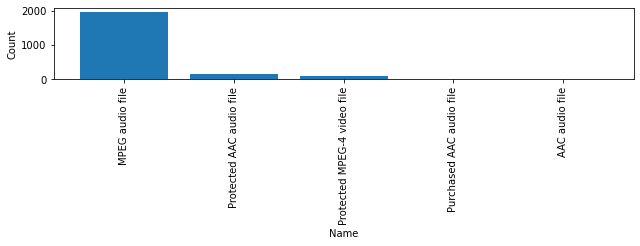

In [15]:
bar_plot(media_types_count['Name'], media_types_count['Count'])

### Album, Artist, Track, Song Length Data Frame

In [16]:
artist_album_track_length_sec = pd.read_csv('artist_album_track_lenght_sec.csv')
artist_album_track_length_sec

,Artist,Album,Track,Song_Length_Sec
0,"Richard Marlow & The Choir of Trinity College,...",Mezmerize,Soldier Side - Intro,63
1,Edo de Waart & San Francisco Symphony,Diver Down,Happy Trails,65
2,House Of Pain,Riot Act,Arc,65
3,Les Arts Florissants & William Christie,House of Pain,Salutations,69
4,Marcos Valle,Afrociberdelia,Interlude Zumbi,71
...,...,...,...,...
3371,Calexico,"Battlestar Galactica (Classic), Season 1","Battlestar Galactica, Pt. 2",2956
3372,Calexico,"Battlestar Galactica (Classic), Season 1",The Man With Nine Lives,2956
3373,Calexico,"Battlestar Galactica (Classic), Season 1","Greetings from Earth, Pt. 1",2960
3374,Boston Symphony Orchestra & Seiji Ozawa,"Lost, Season 3",Through a Looking Glass,5088


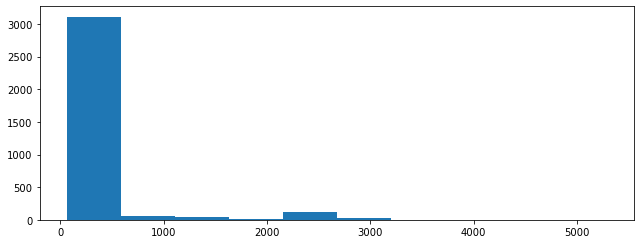

In [18]:
plt.hist(artist_album_track_length_sec['Song_Length_Sec']);

In [23]:
artist_album_track_length_sec['Song_Length_Sec'].skew()

3.920081022689682

In [24]:
artist_album_track_length_sec['Song_Length_Sec'].kurtosis()

15.428895043770613

There appears to be a few outliers, I will set the dataframe to 500 seconds limit.

In [26]:
song_length_500 = artist_album_track_length_sec[artist_album_track_length_sec['Song_Length_Sec']<500]
song_length_500

,Artist,Album,Track,Song_Length_Sec
0,"Richard Marlow & The Choir of Trinity College,...",Mezmerize,Soldier Side - Intro,63
1,Edo de Waart & San Francisco Symphony,Diver Down,Happy Trails,65
2,House Of Pain,Riot Act,Arc,65
3,Les Arts Florissants & William Christie,House of Pain,Salutations,69
4,Marcos Valle,Afrociberdelia,Interlude Zumbi,71
...,...,...,...,...
3048,Seu Jorge,Blood Sugar Sex Magik,Sir Psycho Sexy,496
3049,Van Halen,Master Of Puppets,Disposable Heroes,496
3050,Velvet Revolver,ReLoad,Fixxxer,496
3051,"Roger Norrington, London Classical Players","LOST, Season 4",LOST In 8:15,497


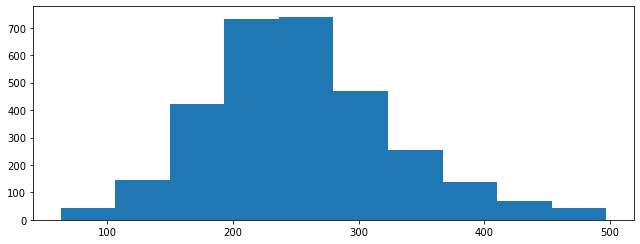

In [27]:
plt.hist(song_length_500['Song_Length_Sec']);

In [28]:
song_length_500['Song_Length_Sec'].skew()

0.5509746251361313

In [29]:
song_length_500['Song_Length_Sec'].kurtosis()

0.4413982057596124

This looks better distributed, but kurtosis is low.

## Percentages

In [31]:
def pie_chart(x, labels, title=None):
    '''
    pie chart
    x = count, list df
    labels = labels of the count, list df
    title = title, str
    '''
    plt.pie(x, labels=labels)
    plt.title(title)

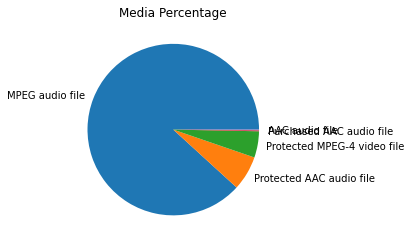

In [32]:
pie_chart(media_types_count['Count'],
         media_types_count['Name'],
         title='Media Percentage')

### Genre Count

In [33]:
genre_count = pd.read_csv('genre_count.csv')
genre_count

,Genre,Genre_Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


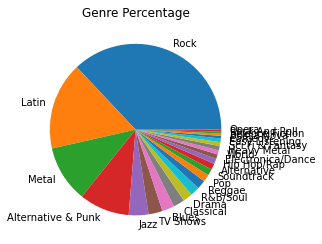

In [34]:
pie_chart(genre_count['Genre_Count'],
         genre_count['Genre'],
         title='Genre Percentage')